* Creator: Nirvan S.P. Theethira
* Date: 04/25/2020
* The file is written to implement and test the class `Geoguessr` in the `geoLSTM.py` file. The notebook is used to build the `geoLSTM` model and train it on loaded data. Test data can also be loaded using the notebook and the model can be tested.
* Note: Run details are specified in each cell. The notebook can be run on drive. The data contained in this repo is just a sample. The entire data is available on drive at: https://drive.google.com/drive/folders/17nt3Bvcsq-ndvY-uRddk3ZFQpc8EdCzL?usp=sharing

In [1]:
from shapely.geometry import Point, Polygon
from matplotlib import pyplot as plt
from math import sin, cos, sqrt, atan2, radians

import shapely
import pickle
import random
import numpy as np
import gmaps, os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from ipywidgets.embed import embed_minimal_html
import webbrowser
# The functions of Geoguessr class are loaded 
# from the geoLSTM.py file
import geoLSTM

# directory containing data
DATADIR = "../infoExtraction/data"
DATACOMBINED = DATADIR + "/dataCombinedSamples/"
POLYDIR = "../infoExtraction" 
# directory to store model in
MODELDIR = "models"

# Directory structure to use on Colab
# UNCOMMENT FOR COLAB:

# !pip install gmaps
# DATADIR = '/content/drive/My Drive/geoguessrLSTM'
# POLYDIR = '/content/drive/My Drive/geoguessrLSTM'
# DATACOMBINED = DATADIR + "/dataCombined/"
# MODELDIR = '/content/drive/My Drive/geoguessrLSTM/models'
# import sys
# sys.path.append(DATADIR)
# import geoLSTM

## Load training and testing data
* The list of training and test location folder names are loaded into `TF` and `TESF` respectively. Note only the list of sample train and test files are loaded in the local repo. 
* The file that contains split polygon file of USA eg: "infoExtraction/usaPolyGrid.pkl" is loaded into `usaPolyGrid`

In [2]:
# load training image file names
TF = np.load(DATADIR + '/trainFiles.npy')
# load testing image file names
TESF = np.load(DATADIR +'/testFiles.npy')
print("Train files: {}, Test files: {}".format(len(TF), len(TESF)))

Train files: 8, Test files: 2


243


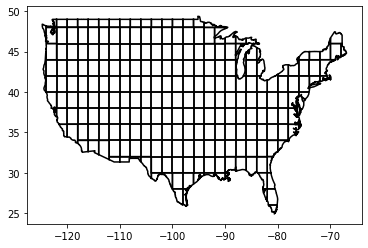

In [3]:
# load split grid file
usaPolyGrid = pickle.load(open(POLYDIR + "/usaPolyGrid.pkl",'rb'))
for i in usaPolyGrid.values():
    plt.plot(i[:,1],i[:,0], color='black')
print(len(usaPolyGrid))

## Create and train model
* `useRestnet`: set to True to use pretrained frozen restnet model set to False to use trainable CNN model

In [12]:
geoModel = geoLSTM.Geoguessr(useRestnet=False)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 3, 512)            2994048   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                147712    
_________________________________________________________________
dense (Dense)                (None, 1024)              66560     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

* Specify `batchSize` to split training data location folder names into and the number of `epochs` to train each batch on

Getting data from directory: ../infoExtraction/data/dataCombinedSamples/
Read 5 points. Training now
Train on 5 samples
Epoch 1/2
5/5 [==============================] - 23s 5s/sample - loss: 5.4530 - categorical_accuracy: 0.0000e+00
Epoch 2/2
5/5 [==============================] - 21s 4s/sample - loss: 5.3746 - categorical_accuracy: 0.0000e+00
Training sucessfull!!

Saving model 0 with loss 5.375 at models
Read 3 points. Training now
Train on 3 samples
Epoch 1/2
3/3 [==============================] - 13s 4s/sample - loss: 5.5265 - categorical_accuracy: 0.0000e+00
Epoch 2/2
3/3 [==============================] - 13s 4s/sample - loss: 5.6889 - categorical_accuracy: 0.0000e+00
Training sucessfull!!

Saving model 1 with loss 5.689 at models


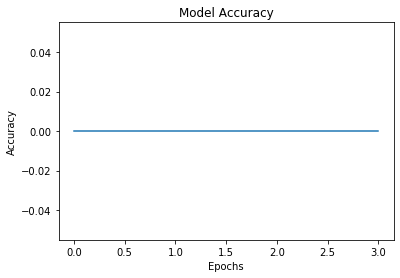

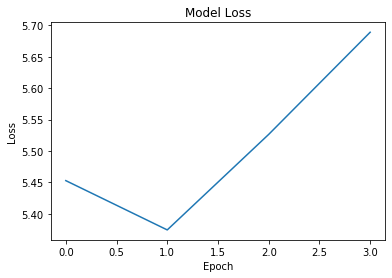

In [13]:
geoModel.fit(TF, DATACOMBINED, 
      saveFolder=MODELDIR, 
      batchSize=4, 
      epochs=2,  
      plot=True)

## Load and test single Model
* Make sure the model file name matches the trained and saved model
* Note: The model files aren't in the local repo. Please check the drive link for the model files

In [4]:
# modelName = '/restnet_5.738_19.h5'
modelName = '/nonrestNet_5.744_12.h5'
geoModel = geoLSTM.Geoguessr.load(MODELDIR + modelName)

Loading model from models/nonrestNet_5.744_12.h5
Loaded model loss 5.744
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 3, 512)            4689216   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                147712    
_________________________________________________________________
dense (Dense)                (None, 1024)              66560     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_______________________________________________

* `TESF[0]` specifies single folder name to use as input data. String that contains test location image triplet folder name. String has to look like: `<gridNo>+<lat,long> => 60+48.4271513,-110.5611851`
* `DATACOMBINED` the directory that stores combined image files eg: "/dataCombinedSamples/"
* `usaPolyGrid` contains the list of polygons that contain make up the USA split into grids. It can be loaded from eg: `"infoExtraction/usaPolyGrid.pkl"`

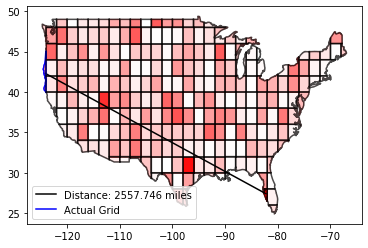

2557.745661269716

In [7]:
geoModel.predictSingle(TESF[0], DATACOMBINED, ployGrid=usaPolyGrid)

* Calculates average of distances between target and predicted grids for a list of files
* `TESF` contains a list of test location image triplet folders. Each element of the list has to look like `<gridNo>+<lat,long>, 60+48.4271513,-110.5611851`
* `DATACOMBINED` is the directory that stores combined image files eg: "/dataCombinedSamples/"
* `usaPolyGrid` contains the list of polygons that contain make up the USA split into grids. It can be loaded from eg: "infoExtraction/usaPolyGrid.pkl"

In [8]:
geoModel.evaluate(TESF, DATACOMBINED, usaPolyGrid)

Evaluated 0 out of 2 points


1477.9636363636057

## Load and test Multiple Models
* Conducts the same evaluations as the previous section but on multiple models and compares the result

In [2]:
models = []
for i in os.listdir(MODELDIR):
    models.append(geoLSTM.Geoguessr.load(MODELDIR + '/' +i))

In [3]:
trainableParams = []
avgDistanceError = []
for gm in models:
    trainableParams.append(sum([tf.keras.backend.count_params(i) for i in gm.model.trainable_weights]))
    avgDistanceError.append(gm.evaluate(TESF, DATACOMBINED, usaPolyGrid))

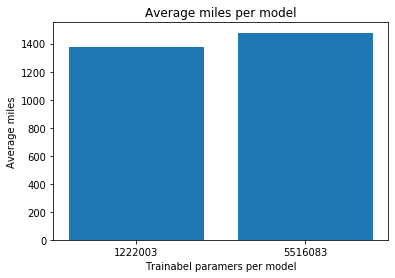

In [11]:
plt.bar(np.arange(len(trainableParams)), height=avgDistanceError)
plt.xticks(np.arange(len(trainableParams)), trainableParams)
plt.xlabel("Trainabel paramers per model")
plt.ylabel("Average miles")
plt.title("Average miles per model")
plt.show()